Gustavo Luiz Conceição Zago: 2268221

Giovanni Henrique Munhoz de Lion Siervo: 2144255

Dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset

##Informações gerais E importações

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Resumo base de dados:

In [ ]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  891
Colunas:  12

Atributos : 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Valores faltantes :   866

Valores únicos :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


##Pré Processamento:

In [ ]:
# Removendo colunas PassagerId, Name
df=df.drop(columns='PassengerId',axis=1)
df=df.drop(columns='Name',axis=1)

In [ ]:
# Verifica a quantidade de dados faltrantes
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
#Substituir NaN em Age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')

df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]

In [ ]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# Transformando coluna Ambarked, Cabin e Ticket em novas colunas diferentes
df = pd.get_dummies(data=df, columns=['Embarked'])
df = pd.get_dummies(data=df, columns=['Ticket'])
df2 = df # realização do algoritmo sem Cabin
df = pd.get_dummies(data=df, columns=['Cabin'])


In [ ]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
            ..
Cabin_F33    0
Cabin_F38    0
Cabin_F4     0
Cabin_G6     0
Cabin_T      0
Length: 838, dtype: int64

In [ ]:
#Transformando valores categoricos da coluna Sex em numéricos
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df[["Sex"]] = \
df[["Sex"]].apply(labelencoder.fit_transform)

##Normalização


In [ ]:
#Normalizando colunas Age e Fare através do StandardScaler
std=StandardScaler()
columns = ['Age', 'Fare']
scaled = std.fit_transform(df[['Age', 'Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
#Trazendo essas novas colunas normalizadas para o dataset
df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Ticket_110152,Ticket_110413,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Age,Fare
0,0,3,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.565736,-0.502445
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.663861,0.786845
2,1,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.258337,-0.488854
3,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.433312,0.420730
4,0,3,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.181487,-0.386671
887,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.796286,-0.044381
888,0,3,0,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.104637,-0.176263
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.258337,-0.044381


##Separação Treino e Teste

In [ ]:
#Ignorando coluna Survived (resultado)
X = df.drop(['Survived'], axis=1).values
y = df['Survived'].values

In [ ]:
#70% teste e 30% treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##Balanceamento de Classes

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Aplica balanceamento nas classes
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
#Checagem via print se as classes estão balanceadas
print(x_train_oversampled.shape)
print(X_train.shape)

(774, 837)
(623, 837)


##Random Forest

In [ ]:
#Parametros Utilizados
forest = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

In [ ]:
#Declaração GridSearch
g_search = GridSearchCV(estimator = forest, param_grid = param_grid, refit = True,
                        cv = 10, return_train_score=True)

In [ ]:
#Realização do treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=30)


In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:
#Carregar dados GridSeach em dataframe
g_results =  pd.DataFrame(g_search.cv_results_)

In [ ]:
#Atributos GridSeash
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
#Acurácia média em 10 folds no treino
acTrainRF = g_results.loc[g_search.best_index_,'mean_test_score']
g_results.loc[g_search.best_index_,'mean_test_score']

0.8877788877788877

In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
model = g_search.best_estimator_
acTestRF = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8246268656716418

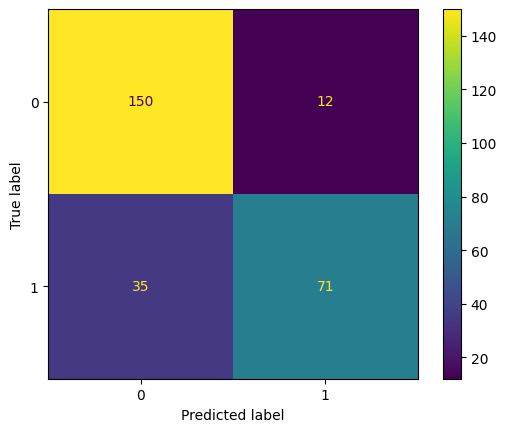

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##KNN

In [ ]:
#Parametros Utilizados
knn = KNeighborsClassifier()
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']}

In [ ]:
#Declaração GridSearch
g_search = GridSearchCV(estimator = knn, param_grid = param_grid, refit = True,
                        cv = 10, return_train_score=True)

In [ ]:
#Realização do treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_estimator_)

KNeighborsClassifier(n_neighbors=28, weights='distance')


In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:
#Carregar dados GridSeach em dataframe
g_results =  pd.DataFrame(g_search.cv_results_)

In [ ]:
#Atributos GridSeash
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
#Acurácia média em 10 folds no treino
acTrainKNN = g_results.loc[g_search.best_index_,'mean_test_score']
g_results.loc[g_search.best_index_,'mean_test_score']

0.8358974358974359

In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
model = g_search.best_estimator_
acTestKNN = model.score(X_test,y_test)
model.score(X_test,y_test)

0.7611940298507462

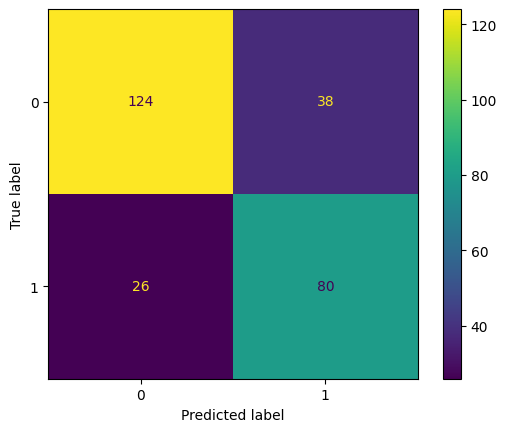

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##Arvore de Decisão

In [ ]:
#Parametros Utilizados
tree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
#Declaração GridSearch
g_search = GridSearchCV(estimator = tree, param_grid = param_grid, refit = True,
                        cv = 10, return_train_score=True)

In [ ]:
#Realização do treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)


In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:
#Carregar dados GridSeach em dataframe
g_results =  pd.DataFrame(g_search.cv_results_)

In [ ]:
#Atributos GridSeash
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
#Acurácia média em 10 folds no treino
acTrainDT = g_results.loc[g_search.best_index_,'mean_test_score']
g_results.loc[g_search.best_index_,'mean_test_score']

0.817982017982018

In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
model = g_search.best_estimator_
acTestDT = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8134328358208955

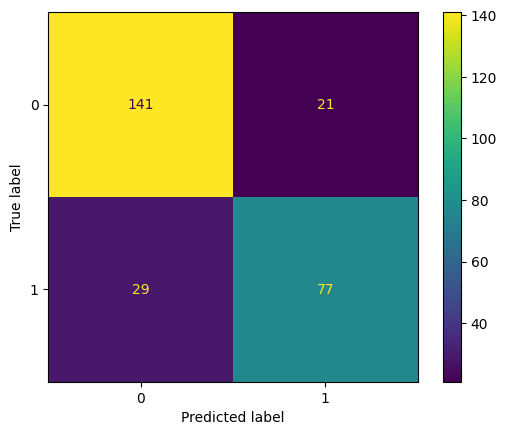

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##**SciKit**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#Parametros Utilizados e declaração GridSearch
mlp = MLPClassifier(max_iter=100)
parameter_grid = {
    'hidden_layer_sizes': [(10,30,10),(25,25),(50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

g_search = GridSearchCV(mlp, parameter_grid, n_jobs=-1, refit = True, cv=10)


In [ ]:
#Realização do treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(10, 30, 10), learning_rate='adaptive',
              max_iter=100)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:

#Carregar dados GridSeach em dataframe
g_results =  pd.DataFrame(g_search.cv_results_)

In [ ]:
#Atributos GridSeash
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
#Acurácia média em 10 folds no treino
acTrainSCI = g_results.loc[g_search.best_index_,'mean_test_score']
g_results.loc[g_search.best_index_,'mean_test_score']

0.8955377955377954

In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
model = g_search.best_estimator_
acTestSCI = model.score(X_test,y_test)
model.score(X_test,y_test)

0.832089552238806

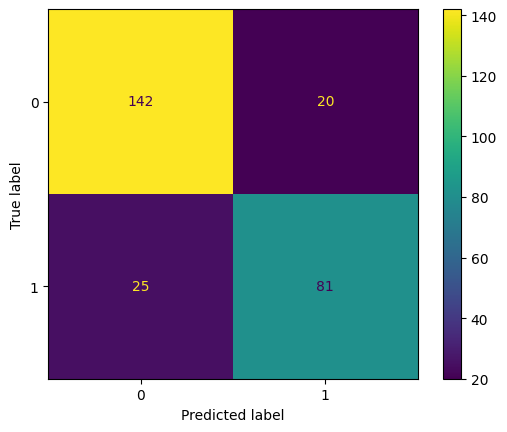

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##**Tensor Flow**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Definindo o modelo do keras
model = Sequential()
model.add(Dense(100, input_shape=(len(df.columns)-1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               83800     
                                                                 
 dense_1 (Dense)             (None, 8)                 808       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 84,617
Trainable params: 84,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compilando modelo com parâmetros desejados
model.compile(optimizer='adam',
			loss='mae',
             metrics=['accuracy'])


In [ ]:
#Realização do treinamento e validação
losses = model.fit(X_train, y_train,

				validation_data=(X_test, y_test),

				batch_size=50,
				epochs=100,
				)


Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.4567 - accuracy: 0.6196 - val_loss: 0.4326 - val_accuracy: 0.6045
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4033 - accuracy: 0.6212 - val_loss: 0.3936 - val_accuracy: 0.6045
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3673 - accuracy: 0.6228 - val_loss: 0.3706 - val_accuracy: 0.6082
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3450 - accuracy: 0.6308 - val_loss: 0.3588 - val_accuracy: 0.6119
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3309 - accuracy: 0.6533 - val_loss: 0.3472 - val_accuracy: 0.6493
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.3151 - accuracy: 0.6902 - val_loss: 0.3352 - val_accuracy: 0.6940
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2948 - accuracy: 0.7400 - val_loss: 0.3216 - val_accuracy: 0.7127
Epoch 8/100


In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.8321


[0.184317946434021, 0.8320895433425903]

In [ ]:
loss, acTrainKer = model.evaluate(X_train, y_train)

20/20 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9952


In [ ]:
#Predição
y_pred = (model.predict(X_test) > 0.5).astype(int)

9/9 [==============================] - 0s 1ms/step


In [ ]:
#Acurácia teste
acTestK = accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.832089552238806

In [ ]:
#Histórico de loss/val de cada epoch
loss_df = pd.DataFrame(losses.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.456716,0.619583,0.432564,0.604478
1,0.403267,0.621188,0.393642,0.604478
2,0.367251,0.622793,0.370628,0.608209
3,0.344983,0.630819,0.358824,0.611940
4,0.330892,0.653291,0.347208,0.649254
...,...,...,...,...
95,0.006470,0.993579,0.182717,0.839552
96,0.005898,0.995185,0.180327,0.835821
97,0.006949,0.993579,0.184295,0.835821
98,0.006795,0.993579,0.180295,0.839552


<Axes: >

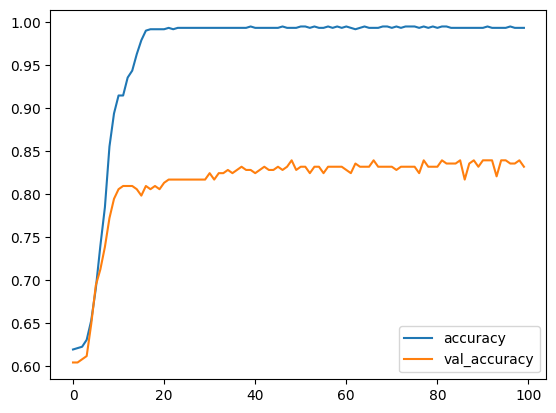

In [ ]:
#Plot de gráfico de acurácia de treino/teste a partir do histórico
loss_df.loc[:,['accuracy','val_accuracy']].plot()


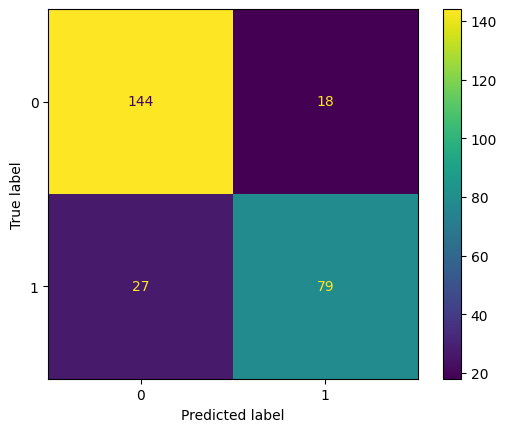

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##Random Forest Sem Cabin

In [ ]:
#Retirando coluna Cabin
df2=df2.drop(columns='Cabin',axis=1)

###Pré Processamento

In [ ]:
#Transformar coluna Sex de categórico para numérico
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df2[["Sex"]] = \
df2[["Sex"]].apply(labelencoder.fit_transform)

In [ ]:
#Checagem de nulos
df2.isna().sum()

Survived              0
Pclass                0
Sex                   0
Age                   0
SibSp                 0
                     ..
Ticket_W./C. 6608     0
Ticket_W./C. 6609     0
Ticket_W.E.P. 5734    0
Ticket_W/C 14208      0
Ticket_WE/P 5735      0
Length: 691, dtype: int64

###Normalização

In [ ]:
#Normalizar colunas Age e Fare
std=StandardScaler()
columns = ['Age', 'Fare']
scaled = std.fit_transform(df2[['Age', 'Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
d2=df2.drop(columns=columns,axis=1)

In [ ]:
#Adicionar colunas normalizas ao dataset
df2=df2.merge(scaled, left_index=True, right_index=True, how = "right")
df2

,Survived,Pclass,Sex,Age_x,SibSp,Parch,Fare_x,Embarked_C,Embarked_Q,Embarked_S,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Age_y,Fare_y
0,0,3,1,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,0,0,-0.565736,-0.502445
1,1,1,0,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,0,0.663861,0.786845
2,1,3,0,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,-0.258337,-0.488854
3,1,1,0,35.0,1,0,53.1000,0,0,1,...,0,0,0,0,0,0,0,0,0.433312,0.420730
4,0,3,1,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,...,0,0,0,0,0,0,0,0,-0.181487,-0.386671
887,1,1,0,19.0,0,0,30.0000,0,0,1,...,0,0,0,0,0,0,0,0,-0.796286,-0.044381
888,0,3,0,28.0,1,2,23.4500,0,0,1,...,0,0,1,0,0,0,0,0,-0.104637,-0.176263
889,1,1,1,26.0,0,0,30.0000,1,0,0,...,0,0,0,0,0,0,0,0,-0.258337,-0.044381


###Separação Treino Teste

In [ ]:
#Retirada da coluna de resultado
X = df2.drop(['Survived'], axis=1).values
y = df2['Survived'].values

In [ ]:
#Separação em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###Balanceamento de Classes

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Aplicar balanceamento de classes
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

In [ ]:
#Checagem se classes estão balanceadas
print(x_train_oversampled.shape)
print(X_train.shape)

(766, 692)
(623, 692)


###Random Forest

In [ ]:
#Parametros Utilizados
forest = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

In [ ]:
#Declaração GridSearch
g_search = GridSearchCV(estimator = forest, param_grid = param_grid, refit = True,
                        cv = 10, return_train_score=True)

In [ ]:
#Realização do treinamento
g_search.fit(x_train_oversampled, y_train_oversampled);
print(g_search.best_estimator_)

RandomForestClassifier(n_estimators=20)


In [ ]:
y_pred = g_search.predict(X_test)

In [ ]:
#Carregar dados GridSeach em dataframe
g_results =  pd.DataFrame(g_search.cv_results_)

In [ ]:
#Atributos GridSeash
g_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
#Acurácia média em 10 folds no treino
acTrainRFC = g_results.loc[g_search.best_index_,'mean_test_score']
g_results.loc[g_search.best_index_,'mean_test_score']

0.8696684894053316

In [ ]:
# Avalia o conjunto teste  com o melhor conjunto de parâmetros encontrado
model = g_search.best_estimator_
acTestRFC = model.score(X_test,y_test)
model.score(X_test,y_test)

0.8283582089552238

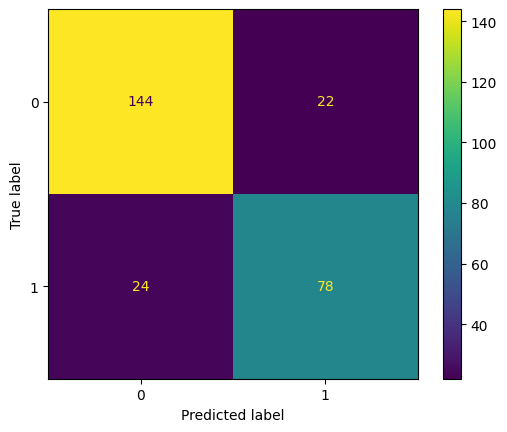

In [ ]:
#Matriz de confusão a partir da predição de Y
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

##Tabulação dos Dados

###Random forest

In [ ]:
print ("Acurácia de Treino Random Forest: " , acTrainRF)
print ("Acurácia de Teste Random Forest: " , acTestRF)

Acurácia de Treino Random Forest:  0.8877788877788877
Acurácia de Teste Random Forest:  0.8246268656716418


###KNN

In [ ]:
print ("Acurácia de Treino KNN: " , acTrainKNN)
print ("Acurácia de Teste KNN: " , acTestKNN)

Acurácia de Treino KNN:  0.8358974358974359
Acurácia de Teste KNN:  0.7611940298507462


###Arvore de decisão

In [ ]:
print ("Acurácia de Treino Arvore de Decisão: " , acTrainDT)
print ("Acurácia de Teste Arvore de Decisão: " , acTestDT)

Acurácia de Treino Arvore de Decisão:  0.817982017982018
Acurácia de Teste Arvore de Decisão:  0.8134328358208955


###Scikit

In [ ]:
print ("Acurácia de Treino Scikit: " , acTrainSCI)
print ("Acurácia de TesteScikit: " , acTestSCI)

Acurácia de Treino Scikit:  0.8955377955377954
Acurácia de TesteScikit:  0.832089552238806


###Keras

In [ ]:
print ("Acurácia de Treino Keras:", acTrainKer)
print ("Acurácia de Teste Keras: " , acTestK)

Acurácia de Treino Keras: 0.995184600353241
Acurácia de Teste Keras:  0.832089552238806


###Random Forest sem coluna Cabin

In [ ]:
print ("Acurácia de Treino Random Forest Sem Cabin: " , acTrainRFC)
print ("Acurácia de Treino Random Forest Sem Cabin: " , acTestRFC)

Acurácia de Treino Random Forest Sem Cabin:  0.8696684894053316
Acurácia de Treino Random Forest Sem Cabin:  0.8283582089552238
